# Question 1

In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [482]:
def y_exact(x):
    return x + 3* np.exp(-x/2) - 2

def f(x,y):
    return (x-y)/2

In [483]:
def Euler(h):
    x = [0]
    y = [1]
    while x[-1] < 3:
        y += [y[-1] + h*f(x[-1],y[-1])]
        x += [x[-1] + h]
    return y


def ModifiedEuler(h):
    #code for modified Euler method
    x=[0]
    y=[1]
    while x[-1]<3:
        temp=y[-1]+h*f(x[-1],y[-1])
        y+=[y[-1]+h*(f(x[-1],y[-1])+f(x[-1]+h,temp))/2]
        x+=[x[-1]+h]

    return y

def modEuler(x0,h):
    return None

In [484]:
def Taylor(h):
    x=[0]
    y=[1]
    while x[-1]<3:
        a=f(x[-1],y[-1])
        b=0.5-0.5*a 
        c=-0.5*b
        d=-0.5*c
        y+=[y[-1]+h*(a+b*h/2+c*h**2/6+d*h**3/24)]
        x+=[x[-1]+h]

    return y

In [485]:
def RungeKutta(h):
    x=[0]
    y=[1]
    while x[-1]<3:
        k1=h*f(x[-1],y[-1])
        k2=h*f(x[-1]+h/2,y[-1]+k1/2)
        k3=h*f(x[-1]+h/2,y[-1]+k2/2)
        k4=h*f(x[-1]+h,y[-1]+k3)
        y+=[y[-1]+(k1+2*k2+2*k3+k4)/6]
        x+=[x[-1]+h]
    return y

In [486]:
def table_create(h):
    makelist=[0]
    while(makelist[-1]<3):
        makelist+=[round(makelist[-1]+h,5)]
    
    exact_val=[y_exact(i) for i in makelist]
    Euler_val=Euler(h)
    ModifiedEuler_val=ModifiedEuler(h)
    Taylor_val=Taylor(h)
    RungeKutta_val=RungeKutta(h)

    error_Euler=[abs(exact_val[i]-Euler_val[i]) for i in range(len(exact_val))]
    error_ModifiedEuler=[abs(exact_val[i]-ModifiedEuler_val[i]) for i in range(len(exact_val))]
    error_Taylor=[abs(exact_val[i]-Taylor_val[i]) for i in range(len(exact_val))]
    error_RungeKutta=[abs(exact_val[i]-RungeKutta_val[i]) for i in range(len(exact_val))]
    error_RungeKutta=np.asarray(error_RungeKutta)

    df=pd.DataFrame({'x':makelist,'y_exact':exact_val,'Euler':Euler_val,'ModifiedEuler':ModifiedEuler_val,'Taylor':Taylor_val,'RungeKutta':RungeKutta_val,'error_Euler':error_Euler,'error_ModifiedEuler':error_ModifiedEuler,'error_Taylor':error_Taylor,'error_RungeKutta':error_RungeKutta})

    return df.round(20)


print("h=1")
table_create(1)

    

h=1


,x,y_exact,Euler,ModifiedEuler,Taylor,RungeKutta,error_Euler,error_ModifiedEuler,error_Taylor,error_RungeKutta
0,0,1.000000,1.000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.819592,0.500,0.875000,0.820312,0.820312,0.319592,0.055408,0.000721,0.000721
2,2,1.103638,0.750,1.171875,1.104513,1.104513,0.353638,0.068237,0.000874,0.000874
3,3,1.669390,1.375,1.732422,1.670186,1.670186,0.294390,0.063031,0.000796,0.000796


In [487]:
print("h=0.5")
table_create(0.5)


h=0.5


,x,y_exact,Euler,ModifiedEuler,Taylor,RungeKutta,error_Euler,error_ModifiedEuler,error_Taylor,error_RungeKutta
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.836402,0.750000,0.843750,0.836426,0.836426,0.086402,0.007348,0.000023,0.000023
2,1.0,0.819592,0.687500,0.831055,0.819628,0.819628,0.132092,0.011463,0.000036,0.000036
3,1.5,0.917100,0.765625,0.930511,0.917142,0.917142,0.151475,0.013412,0.000043,0.000043
4,2.0,1.103638,0.949219,1.117587,1.103683,1.103683,0.154420,0.013949,0.000044,0.000044
5,2.5,1.359514,1.211914,1.373115,1.359557,1.359557,0.147600,0.013601,0.000043,0.000043
6,3.0,1.669390,1.533936,1.682121,1.669431,1.669431,0.135455,0.012731,0.000040,0.000040


In [488]:
print("h=0.25")
table_create(0.25)

h=0.25


,x,y_exact,Euler,ModifiedEuler,Taylor,RungeKutta,error_Euler,error_ModifiedEuler,error_Taylor,error_RungeKutta
0,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.25,0.897491,0.875000,0.898438,0.897491,0.897491,0.022491,0.000947,7.473243e-07,7.473243e-07
2,0.50,0.836402,0.796875,0.838074,0.836404,0.836404,0.039527,0.001671,1.319023e-06,1.319023e-06
3,0.75,0.811868,0.759766,0.814081,0.811870,0.811870,0.052102,0.002213,1.746051e-06,1.746051e-06
4,1.00,0.819592,0.758545,0.822196,0.819594,0.819594,0.061047,0.002604,2.054513e-06,2.054513e-06
5,1.25,0.855784,0.788727,0.858658,0.855787,0.855787,0.067057,0.002873,2.266377e-06,2.266377e-06
6,1.50,0.917100,0.846386,0.920143,0.917102,0.917102,0.070714,0.003043,2.400085e-06,2.400085e-06
7,1.75,1.000586,0.928088,1.003720,1.000589,1.000589,0.072498,0.003134,2.471079e-06,2.471079e-06
8,2.00,1.103638,1.030827,1.106800,1.103641,1.103641,0.072812,0.003161,2.492252e-06,2.492252e-06
9,2.25,1.223957,1.151973,1.227097,1.223960,1.223960,0.071984,0.003139,2.474330e-06,2.474330e-06


In [489]:
print("h=0.125")
table_create(0.125)

h=0.125


,x,y_exact,Euler,ModifiedEuler,Taylor,RungeKutta,error_Euler,error_ModifiedEuler,error_Taylor,error_RungeKutta
0,0.000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.125,0.943239,0.937500,0.943359,0.943239,0.943239,0.005739,0.000120,2.359571e-08,2.359571e-08
2,0.250,0.897491,0.886719,0.897717,0.897491,0.897491,0.010772,0.000226,4.433223e-08,4.433223e-08
3,0.375,0.862087,0.846924,0.862406,0.862087,0.862087,0.015164,0.000318,6.246941e-08,6.246941e-08
4,0.500,0.836402,0.817429,0.836801,0.836402,0.836402,0.018974,0.000399,7.824611e-08,7.824611e-08
5,0.625,0.819847,0.797589,0.820315,0.819847,0.819847,0.022258,0.000468,9.188177e-08,9.188177e-08
6,0.750,0.811868,0.786802,0.812395,0.811868,0.811868,0.025065,0.000528,1.035779e-07,1.035779e-07
7,0.875,0.811946,0.784502,0.812524,0.811946,0.811946,0.027443,0.000578,1.135195e-07,1.135195e-07
8,1.000,0.819592,0.790158,0.820213,0.819592,0.819592,0.029434,0.000621,1.218763e-07,1.218763e-07
9,1.125,0.834348,0.803274,0.835005,0.834349,0.834349,0.031075,0.000656,1.288037e-07,1.288037e-07


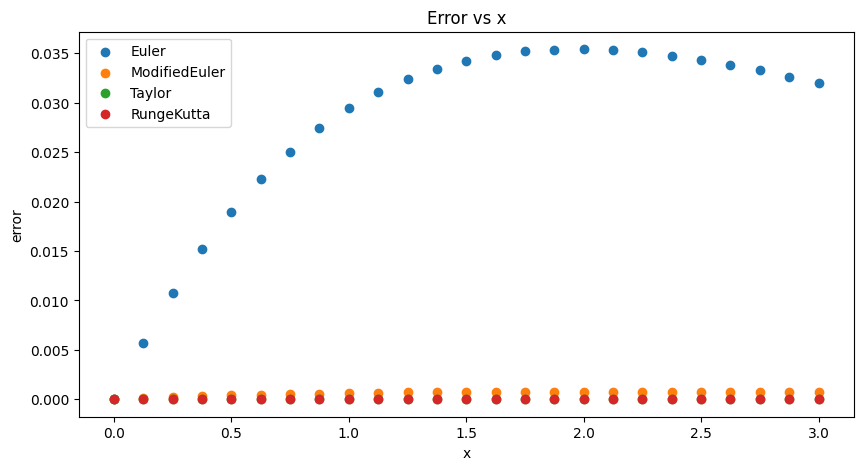

In [490]:
table_max=table_create(0.125)



plt.figure(figsize=(10,5))
plt.scatter(table_max['x'],table_max['error_Euler'],label='Euler')
plt.scatter(table_max['x'],table_max['error_ModifiedEuler'],label='ModifiedEuler')
plt.scatter(table_max['x'],table_max['error_Taylor'],label='Taylor')
plt.scatter(table_max['x'],table_max['error_RungeKutta'],label='RungeKutta')
plt.legend()
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error vs x')
plt.show()


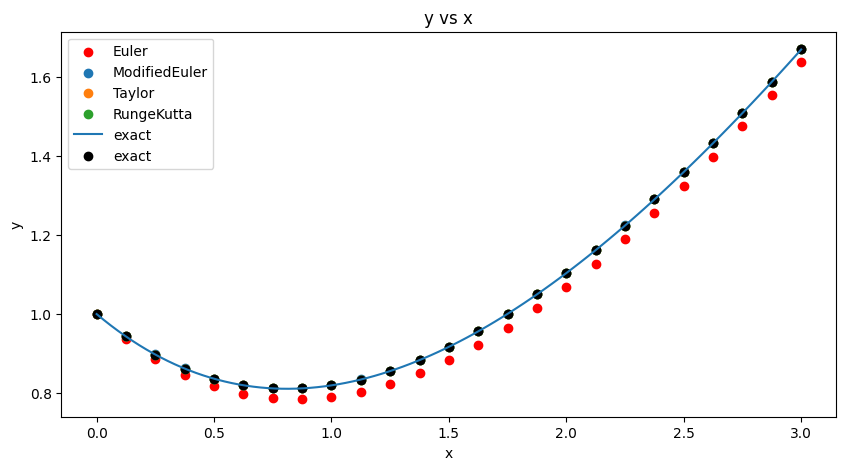

In [491]:
plt.figure(figsize=(10,5))
plt.scatter(table_max['x'],table_max['Euler'],label='Euler',color='red')
plt.scatter(table_max['x'],table_max['ModifiedEuler'],label='ModifiedEuler')
plt.scatter(table_max['x'],table_max['Taylor'],label='Taylor')
plt.scatter(table_max['x'],table_max['RungeKutta'],label='RungeKutta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.plot(np.linspace(0,3,100),[y_exact(i) for i in np.linspace(0,3,100)],label='exact')
plt.scatter(table_max['x'],table_max['y_exact'],label='exact',color='black')
plt.legend()
plt.show()


In [492]:
def AdamBashforth(h):
    x=[0,0.125,0.25,0.375]
    y=RungeKutta(0.125)
    y=y[:4]
    for _ in range(21): 
        y+=[y[-1]+h*(55*f(x[-1],y[-1])-59*f(x[-2],y[-2])+37*f(x[-3],y[-3])-9*f(x[-4],y[-4]))/24]
        x+=[x[-1]+h]
    return y[4:]

adam_data=AdamBashforth(0.125)
y_exact_data=[y_exact(i) for i in np.arange(0.5,3.125,0.125)]
df_adam=pd.DataFrame({'x':np.arange(0.5,3.125,0.125),'y exact':y_exact_data,'Adam Bashforth':adam_data,'Absolute Error':np.abs(np.asarray(y_exact_data)-np.asarray(adam_data))})
df_adam.round(10).astype(str).to_latex('adam.tex',index=False)
df_adam


,x,y exact,Adam Bashforth,Absolute Error
0,0.500,0.836402,0.836403,9.417343e-07
1,0.625,0.819847,0.819849,1.642865e-06
2,0.750,0.811868,0.811870,2.327112e-06
3,0.875,0.811946,0.811948,2.889537e-06
4,1.000,0.819592,0.819595,3.385204e-06
5,1.125,0.834348,0.834352,3.805097e-06
6,1.250,0.855784,0.855788,4.163681e-06
7,1.375,0.883495,0.883499,4.464046e-06
8,1.500,0.917100,0.917104,4.713076e-06
9,1.625,0.956242,0.956247,4.915405e-06


In [493]:
def AdamMoulton(h):
    x=[0,0.125,0.25]
    y=RungeKutta(0.125)

    x=x[:3]   #use the initial values from RungeKutta
    y=y[:3]


    for _ in range(22):
        y+=[(1/(1+9*h/48))*(y[-1]+h/24*(9/2*(x[-1]+h)+19/2*(x[-1]-y[-1])-5/2*(x[-2]-y[-2])+1/2*(x[-3]-y[-3])))]
        x+=[x[-1]+h]

    return y[3:]



adam_moulton_data=AdamMoulton(0.125)
y_exact_data=[y_exact(i) for i in np.arange(0.375,3.125,0.125)]
df_moulton=pd.DataFrame({'x':np.arange(0.375,3.125,0.125),'y exact':y_exact_data,'Adam Moulton':adam_moulton_data,'Absolute Error':np.abs(np.asarray(y_exact_data)-np.asarray(adam_moulton_data))})
df_moulton.round(10).astype(str).to_latex('moulton.tex',index=False)
df_moulton


,x,y exact,Adam Moulton,Absolute Error
0,0.375,0.862087,0.862087,2.484253e-08
1,0.500,0.836402,0.836402,8.486712e-08
2,0.625,0.819847,0.819847,1.377735e-07
3,0.750,0.811868,0.811868,1.839524e-07
4,0.875,0.811946,0.811945,2.240305e-07
5,1.000,0.819592,0.819592,2.585770e-07
6,1.125,0.834348,0.834348,2.881150e-07
7,1.250,0.855784,0.855784,3.131245e-07
8,1.375,0.883495,0.883494,3.340460e-07
9,1.500,0.917100,0.917099,3.512829e-07


In [494]:
#merge the two dataframes



df_adam['Adams Moulton']=df_moulton['Adams Moulton']
df_adam['Absolute Error Moulton']=df_moulton['Absolute Error']

df_new=pd.DataFrame({'x':[0.375],'y exact':[y_exact(0.375)],'Adams Bashforth':["-"],'Absolute Error':["-"],'Adams Moulton':[AdamMoulton(0.375)[0]],'Absolute Error Moulton':[np.abs(y_exact(0.375)-AdamMoulton(0.375)[0])]})

df_adam=pd.concat([df_new,df_adam])
df_adam.round(5).astype(str).to_latex('adam_moulton.tex',index=False)
